In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_paths = {
    "COT": {
        "aime24": "COT/aime24_COT.csv",
        "gpqa": "COT/gpqa_COT.csv",
        "math500": "COT/math500_COT.csv",
    },
    "Standard": {
        "aime24": "Standard/aime24_Standard.csv",
        "gpqa": "Standard/gpqa_Standard.csv",
        "math500": "Standard/math500_Standard.csv",
    },
    "ZeroShot": {
        "aime24": "ZeroShot/aime24_ZeroShot.csv",
        "gpqa": "ZeroShot/gpqa_ZeroShot.csv",
        "math500": "ZeroShot/math500_ZeroShot.csv",
    },
    "COD": {
        "aime24": "COD/aime24_COD.csv",
        "gpqa": "COD/gpqa_COD.csv",
        "math500": "COD/math500_COD.csv",
    },
    "SFT_1e4": {
        "aime24": "SFT/aime24_1e4_sft.csv",
        "gpqa": "SFT/gpqa_1e4_sft.csv",
        "math500": "SFT/math500_1e4_sft.csv",
    },
    "SFT_1e5": {
        "aime24": "SFT/aime24_1e5_sft.csv",
        "gpqa": "SFT/gpqa_1e5_sft.csv",
        "math500": "SFT/math500_1e5_sft.csv",
    },
    "SFT_1e6": {
        "aime24": "SFT/aime24_1e6_sft.csv",
        "gpqa": "SFT/gpqa_1e6_sft.csv",
        "math500": "SFT/math500_1e6_sft.csv",
    },
    "SFT_2e4": {
        "aime24": "SFT/aime24_2e4_sft.csv",
        "gpqa": "SFT/gpqa_2e4_sft.csv",
        "math500": "SFT/math500_2e4_sft.csv",
    },
    "SFT_5e6": {
        "aime24": "SFT/aime24_5e6_sft.csv",
        "gpqa": "SFT/gpqa_5e6_sft.csv",
        "math500": "SFT/math500_5e6_sft.csv",
    },
    "R1": {
        "aime24": "R1/aime24_ZeroShot_R1.csv",
        "gpqa": "R1/gpqa_ZeroShot_R1.csv",
        "math500": "R1/math500_ZeroShot_R1.csv",
    },
}


COT


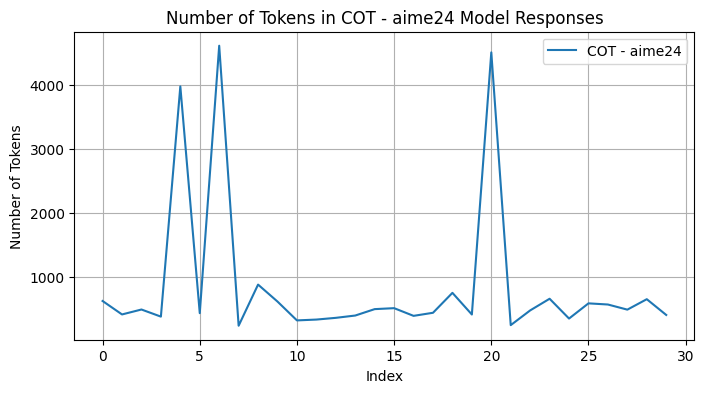

Number of spikes in COT - aime24: 3


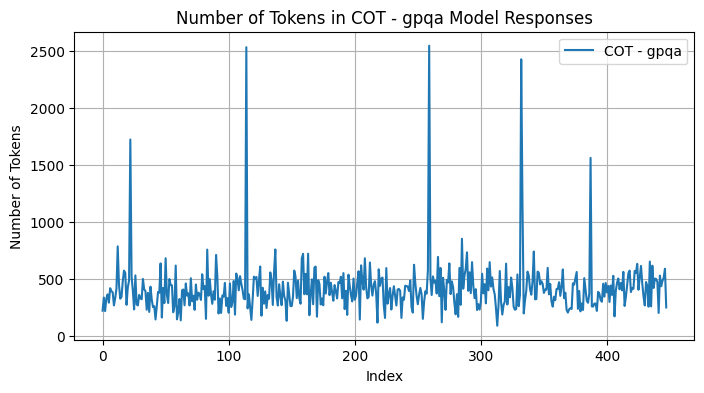

Number of spikes in COT - gpqa: 5


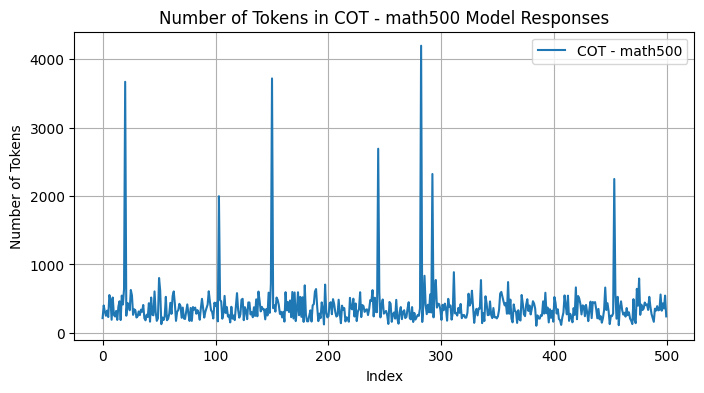

Number of spikes in COT - math500: 7
Standard


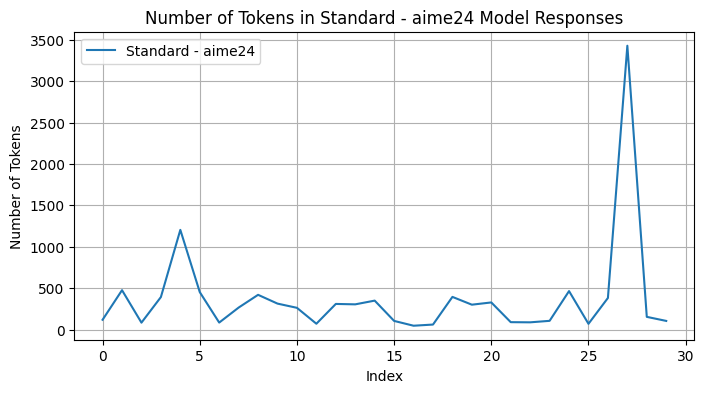

Number of spikes in Standard - aime24: 1


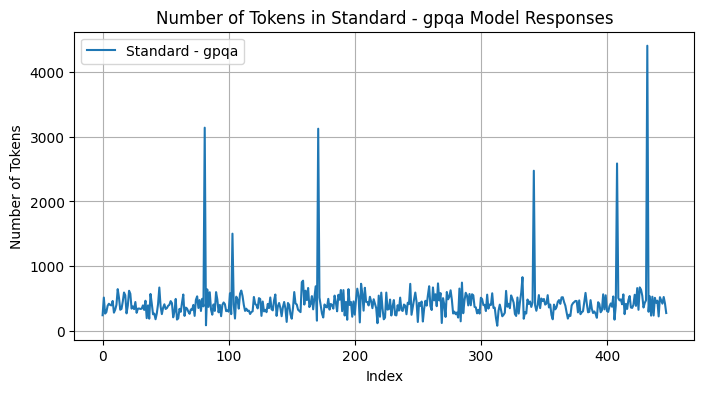

Number of spikes in Standard - gpqa: 6


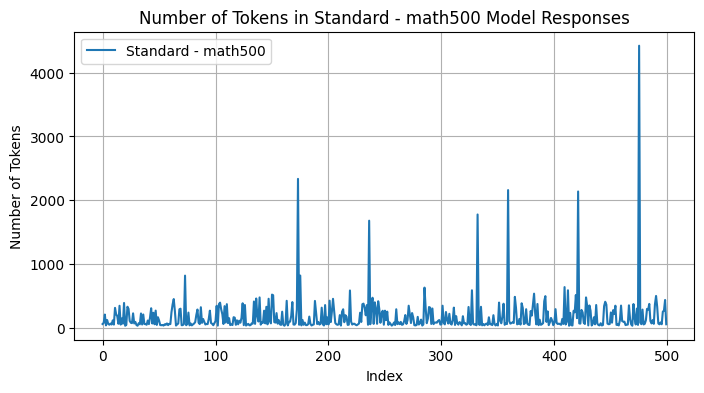

Number of spikes in Standard - math500: 27
ZeroShot


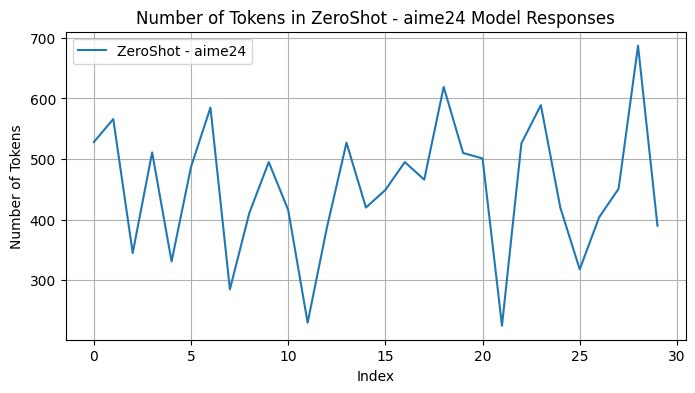

Number of spikes in ZeroShot - aime24: 0


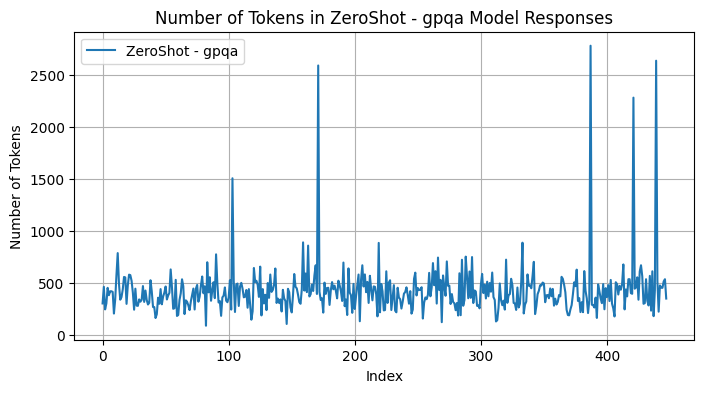

Number of spikes in ZeroShot - gpqa: 5


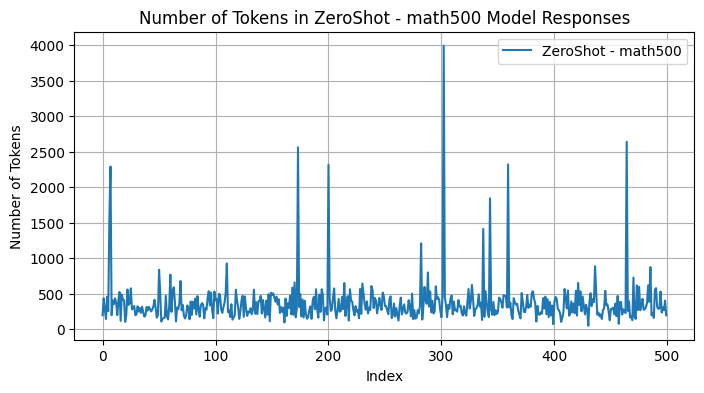

Number of spikes in ZeroShot - math500: 9
COD


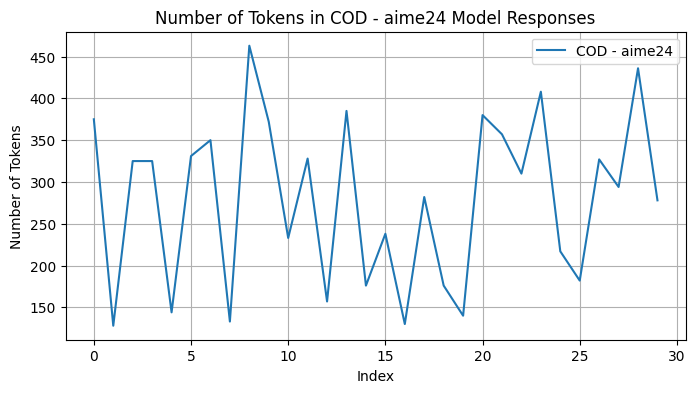

Number of spikes in COD - aime24: 0


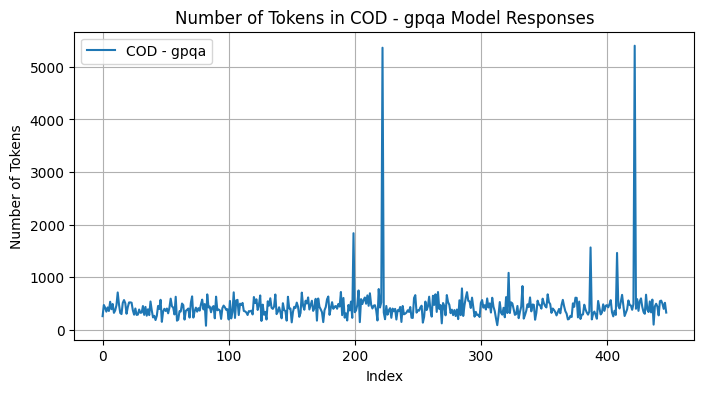

Number of spikes in COD - gpqa: 5


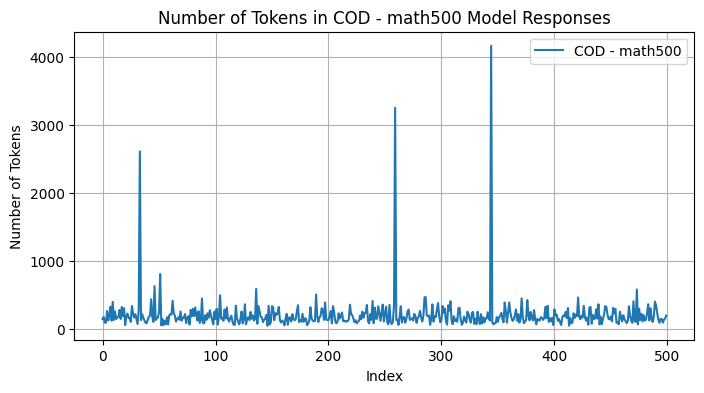

Number of spikes in COD - math500: 4
SFT_1e4


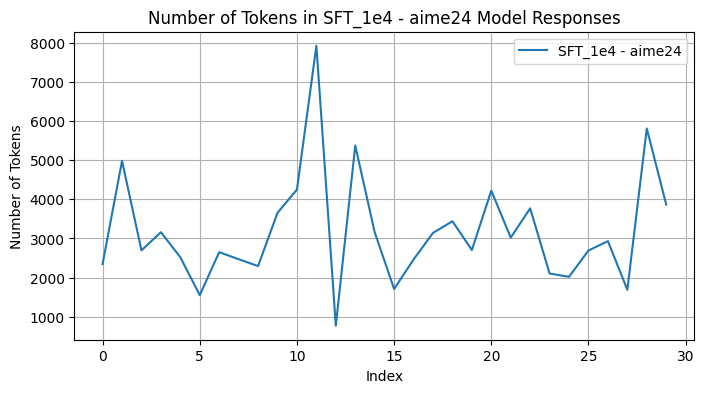

Number of spikes in SFT_1e4 - aime24: 0


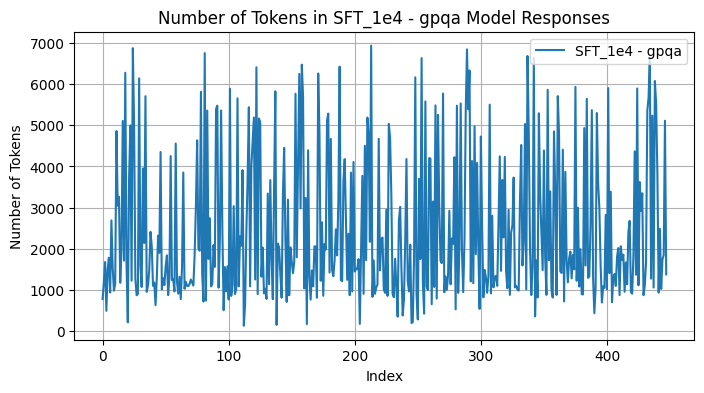

Number of spikes in SFT_1e4 - gpqa: 0


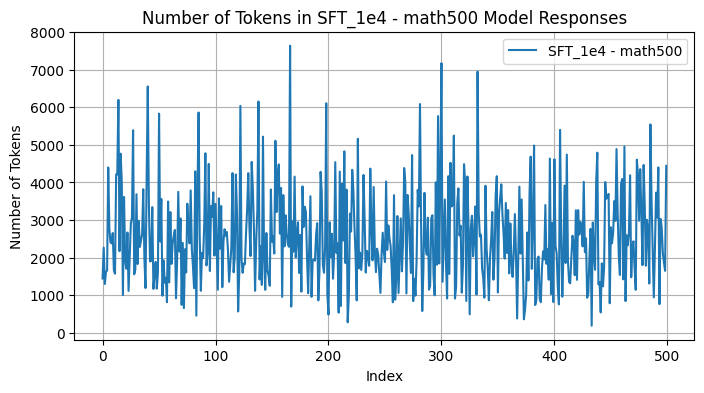

Number of spikes in SFT_1e4 - math500: 0
SFT_1e5


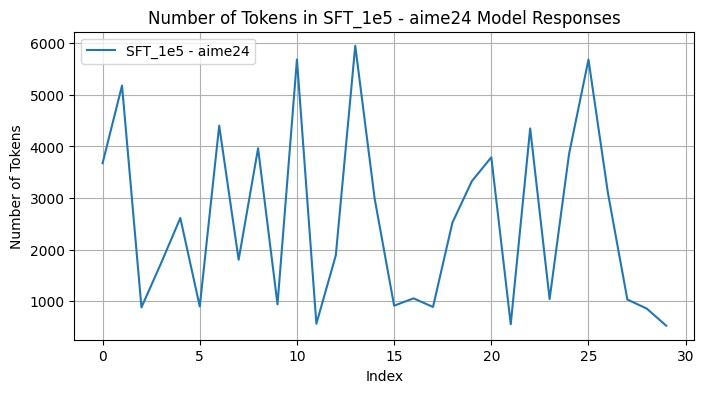

Number of spikes in SFT_1e5 - aime24: 0


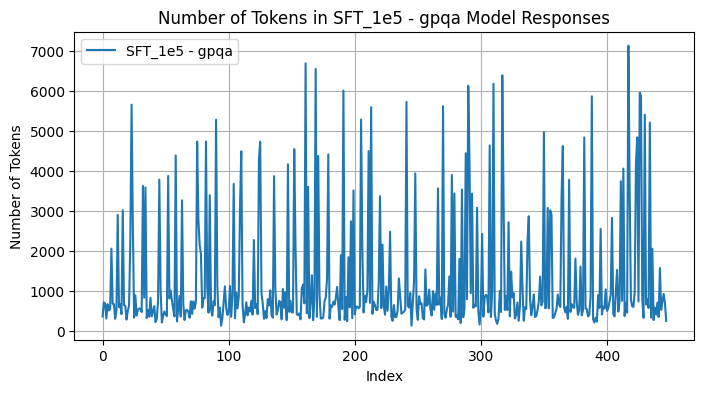

Number of spikes in SFT_1e5 - gpqa: 60


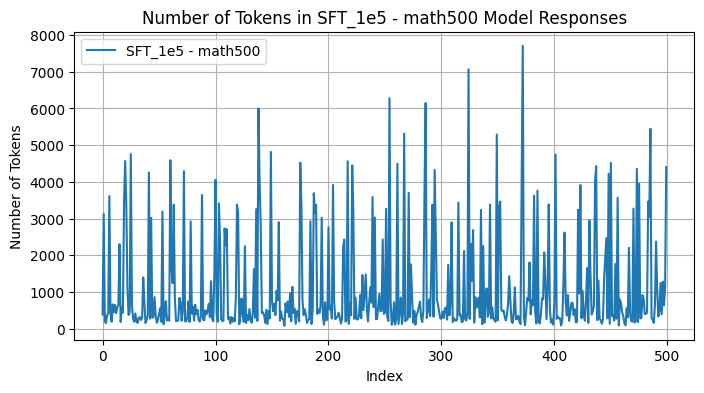

Number of spikes in SFT_1e5 - math500: 74
SFT_1e6


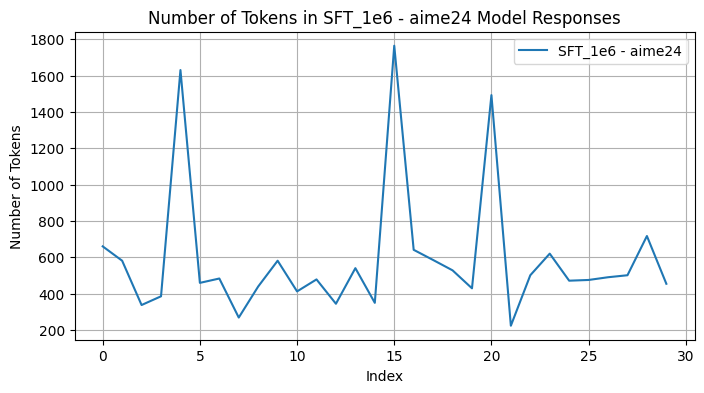

Number of spikes in SFT_1e6 - aime24: 3


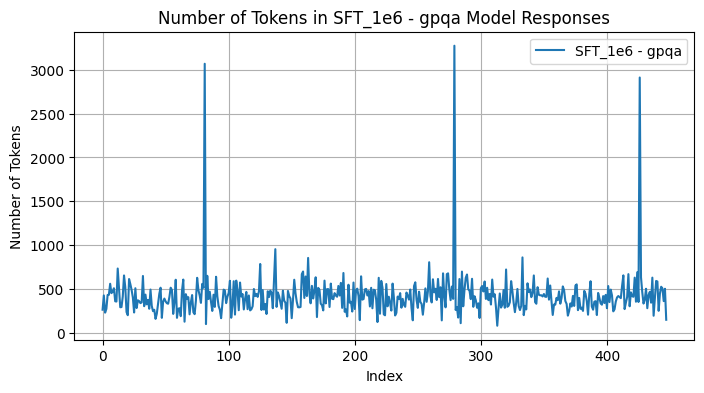

Number of spikes in SFT_1e6 - gpqa: 3


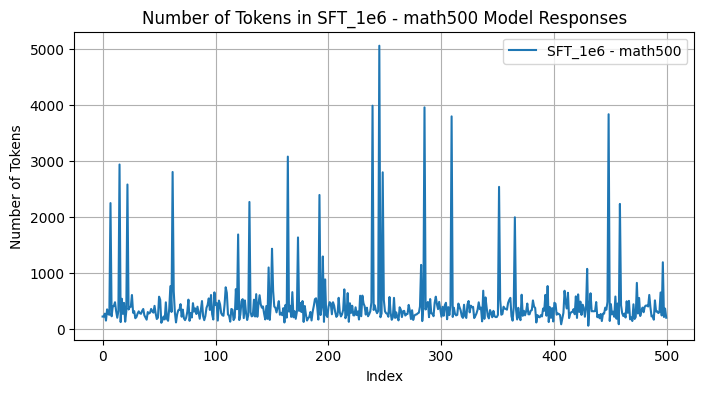

Number of spikes in SFT_1e6 - math500: 20
SFT_2e4


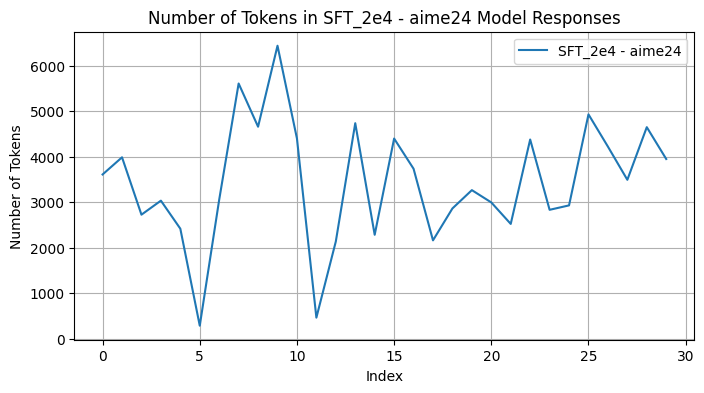

Number of spikes in SFT_2e4 - aime24: 0


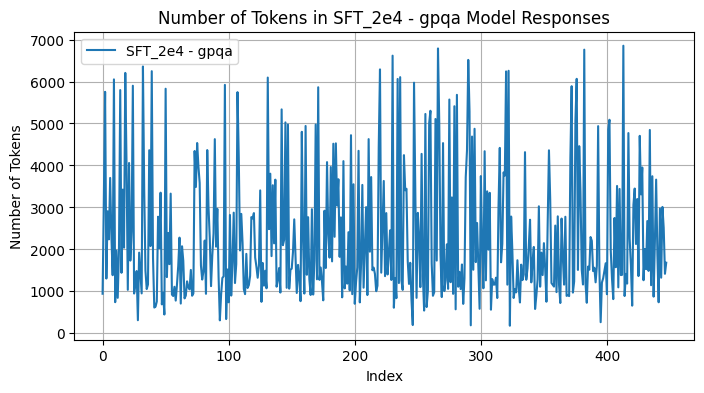

Number of spikes in SFT_2e4 - gpqa: 0


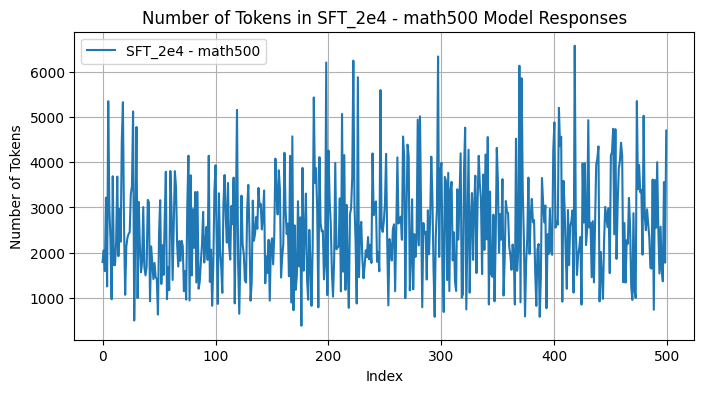

Number of spikes in SFT_2e4 - math500: 0
SFT_5e6


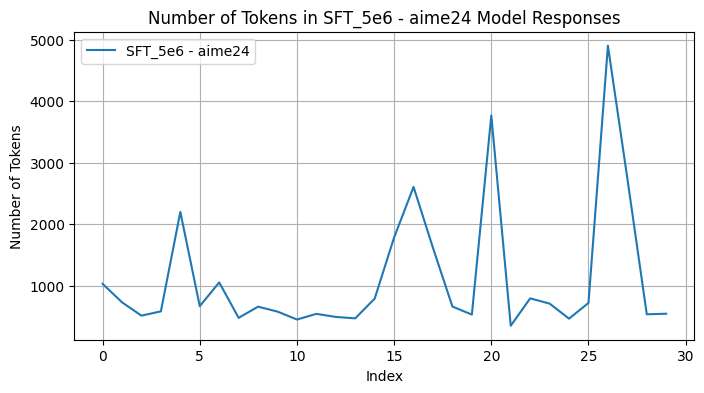

Number of spikes in SFT_5e6 - aime24: 4


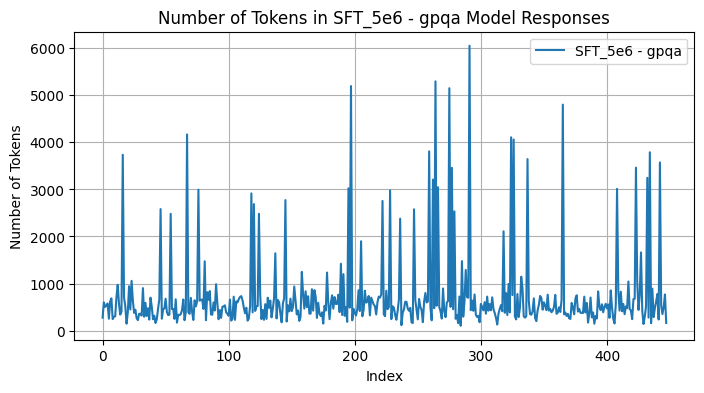

Number of spikes in SFT_5e6 - gpqa: 32


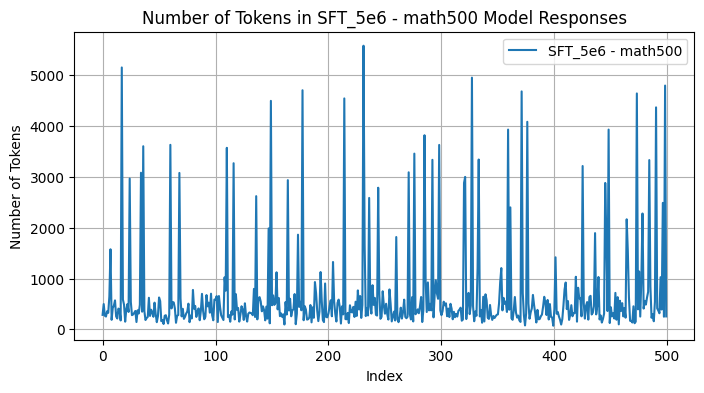

Number of spikes in SFT_5e6 - math500: 44
R1


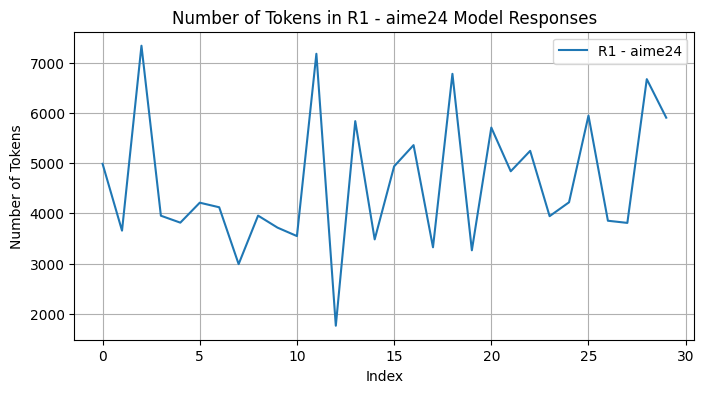

Number of spikes in R1 - aime24: 0


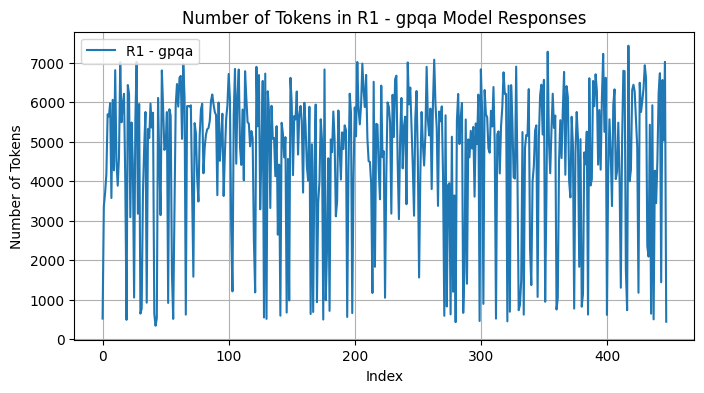

Number of spikes in R1 - gpqa: 0


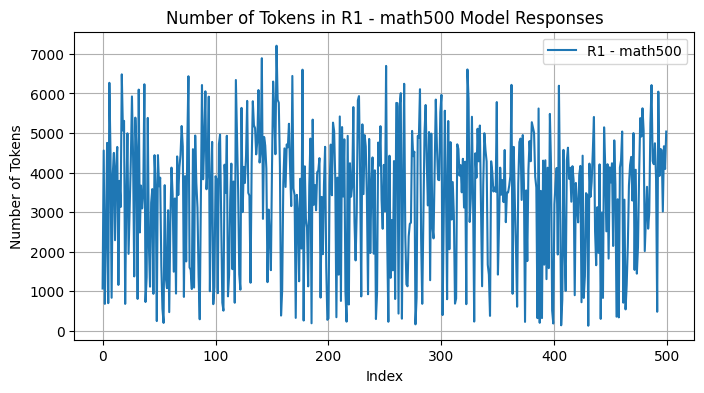

Number of spikes in R1 - math500: 0


In [12]:
datasets = ["aime24", "gpqa", "math500"]


for prompt_type, dataset_paths in file_paths.items():
    print(prompt_type)
    for dataset in datasets:
        try:
            file_path = dataset_paths[dataset]
            df = pd.read_csv(file_path)

            # Calculate number of tokens
            df["num_tokens"] = df["model_response"].apply(
                lambda x: len(x.split()) if isinstance(x, str) else 0
            )  # Handle potential NaN values

            # Create the plot
            plt.figure(figsize=(8, 4))
            plt.plot(df["num_tokens"], label=f"{prompt_type} - {dataset}")
            plt.title(f"Number of Tokens in {prompt_type} - {dataset} Model Responses")
            plt.xlabel("Index")
            plt.ylabel("Number of Tokens")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Count spikes using MAD
            tokens = df["num_tokens"]
            median_tokens = tokens.median()
            mad = np.median(np.abs(tokens - median_tokens))

            #Handle the zero MAD, avoid ZeroDivisionError
            if mad == 0:
                threshold = median_tokens + (10 * tokens.std()) # Fallback to std dev if MAD is zero.
            
            else:
                threshold = median_tokens + (10 * mad)  # Adjust the multiplier as needed


            num_spikes = (tokens > threshold).sum()
            print(f"Number of spikes in {prompt_type} - {dataset}: {num_spikes}")

        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except KeyError as e:
            print(f"KeyError: {e} in {file_path}. Check column names.")
        except Exception as e:
            print(f"An unexpected error occurred processing {file_path}: {e}")

COT


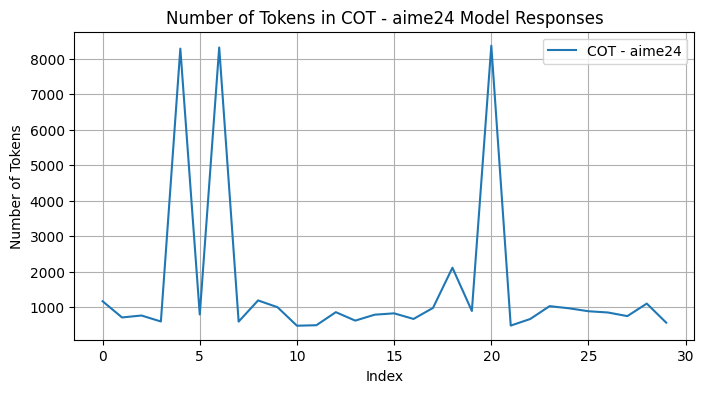

Number of spikes in COT - aime24: 3


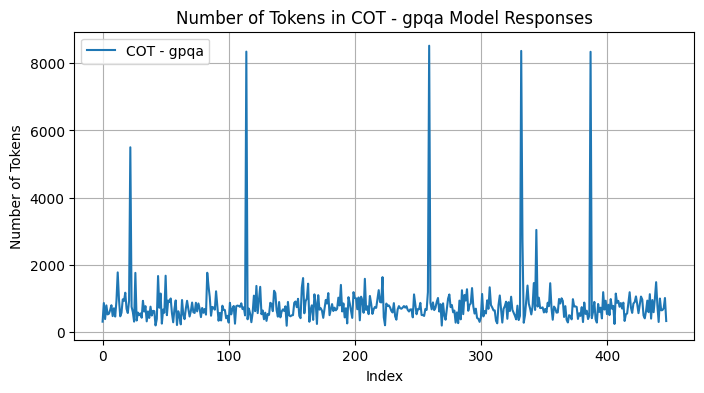

Number of spikes in COT - gpqa: 4


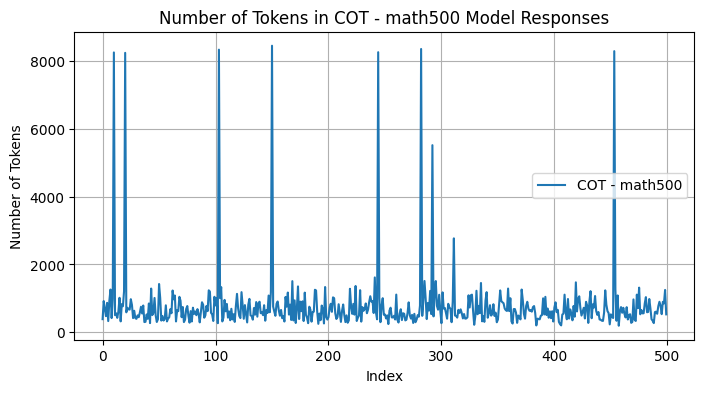

Number of spikes in COT - math500: 7
   Dataset   Avg Tokens  Num Spikes
0   aime24  1592.100000           3
1     gpqa   801.424107           4
2  math500   775.618000           7


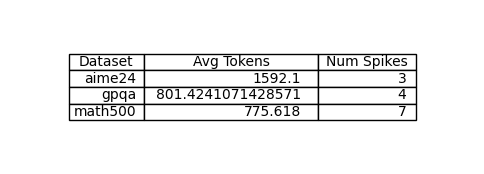

Standard


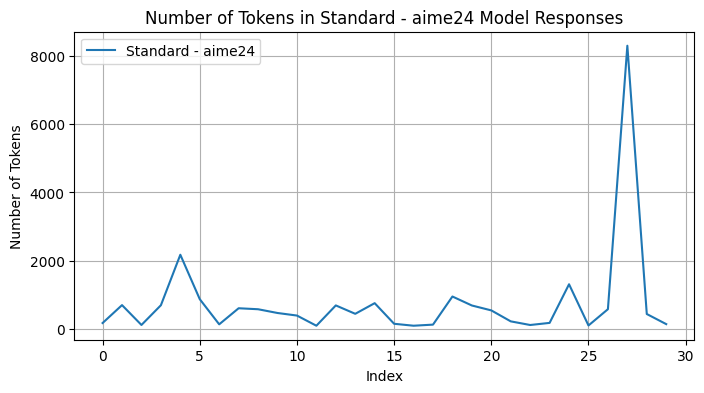

Number of spikes in Standard - aime24: 1


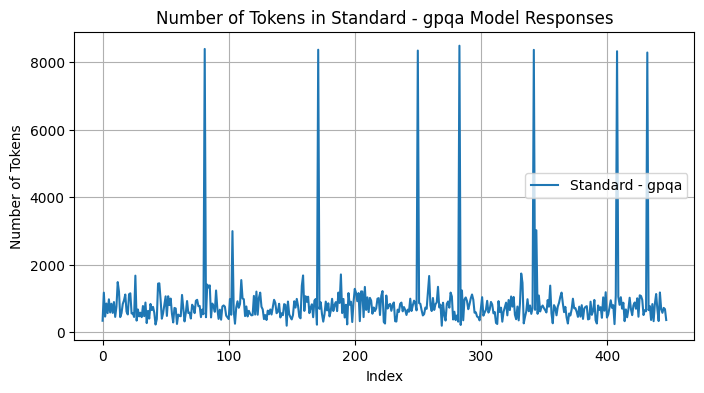

Number of spikes in Standard - gpqa: 7


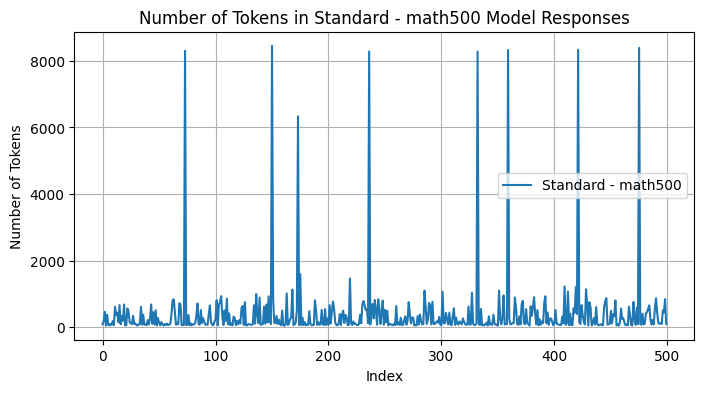

Number of spikes in Standard - math500: 7
   Dataset  Avg Tokens  Num Spikes
0   aime24  762.500000           1
1     gpqa  852.959821           7
2  math500  405.526000           7


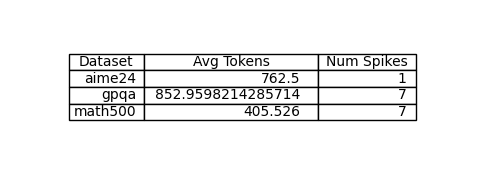

ZeroShot


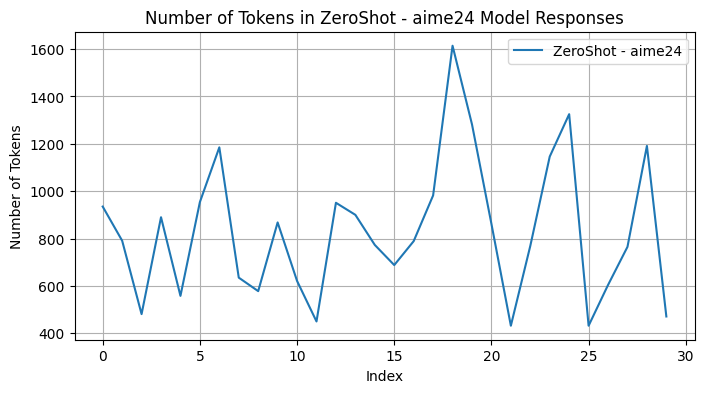

Number of spikes in ZeroShot - aime24: 0


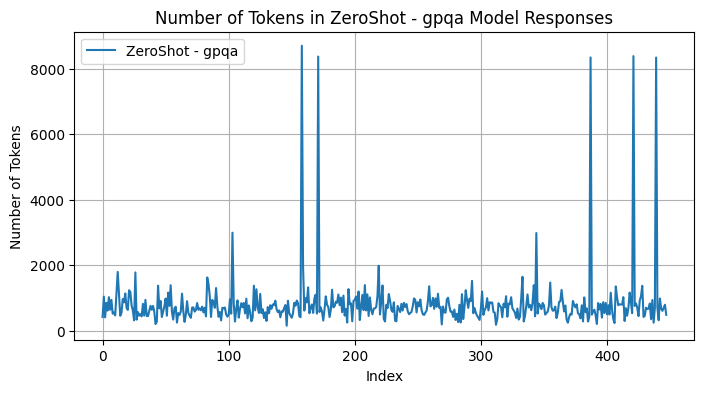

Number of spikes in ZeroShot - gpqa: 5


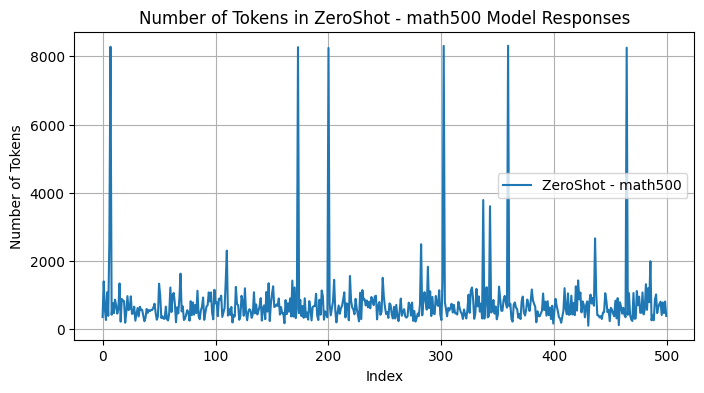

Number of spikes in ZeroShot - math500: 6
   Dataset  Avg Tokens  Num Spikes
0   aime24  830.733333           0
1     gpqa  807.727679           5
2  math500  753.886000           6


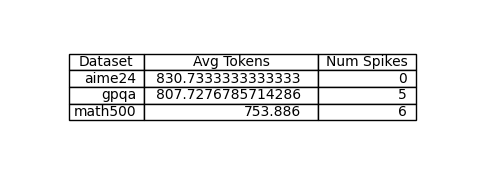

COD


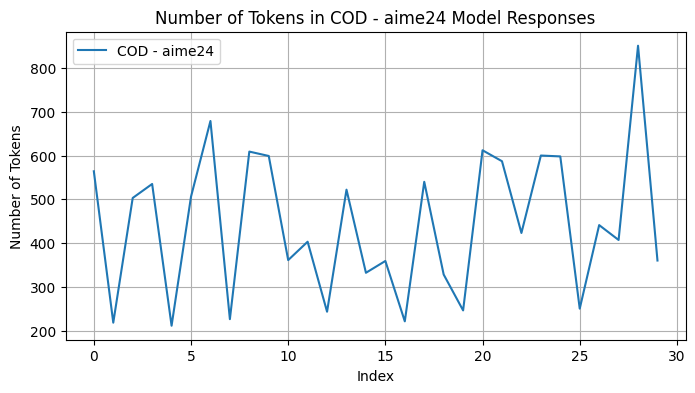

Number of spikes in COD - aime24: 0


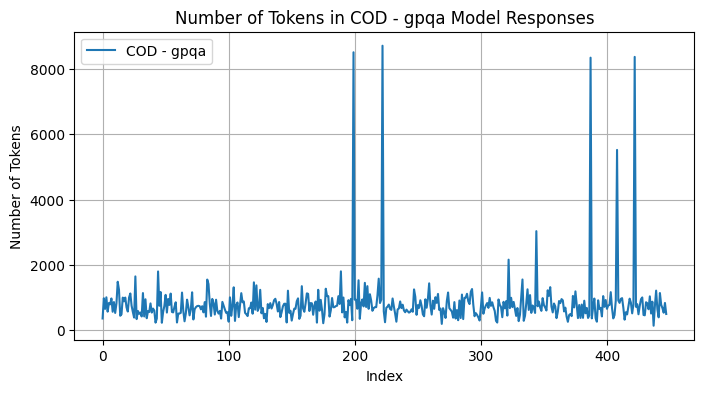

Number of spikes in COD - gpqa: 4


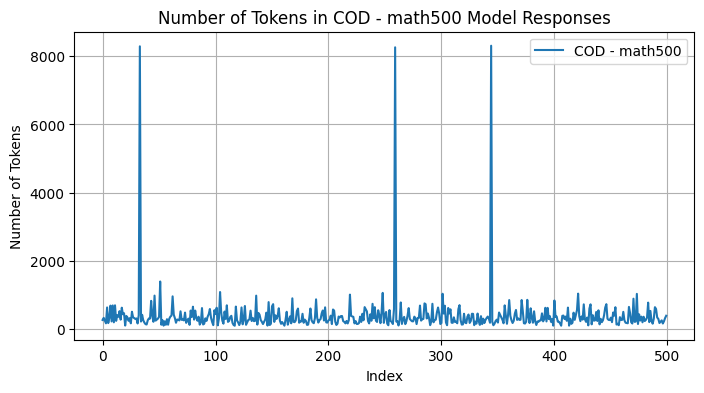

Number of spikes in COD - math500: 3
   Dataset  Avg Tokens  Num Spikes
0   aime24  444.466667           0
1     gpqa  813.223214           4
2  math500  384.594000           3


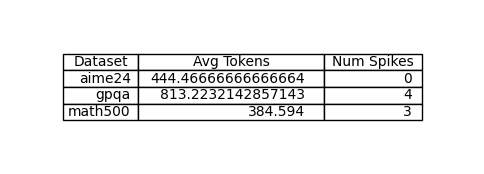

SFT_1e4


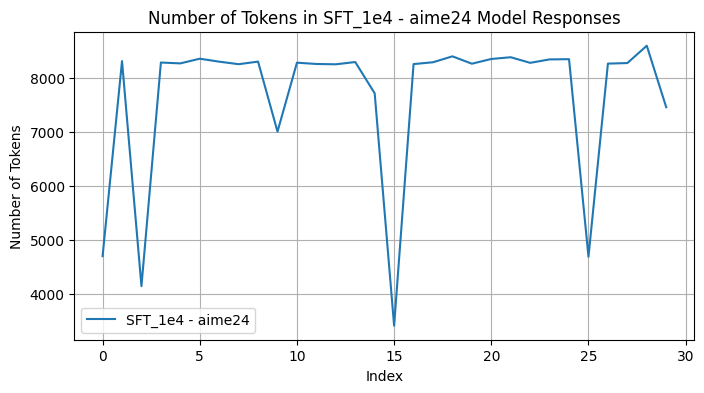

Number of spikes in SFT_1e4 - aime24: 23


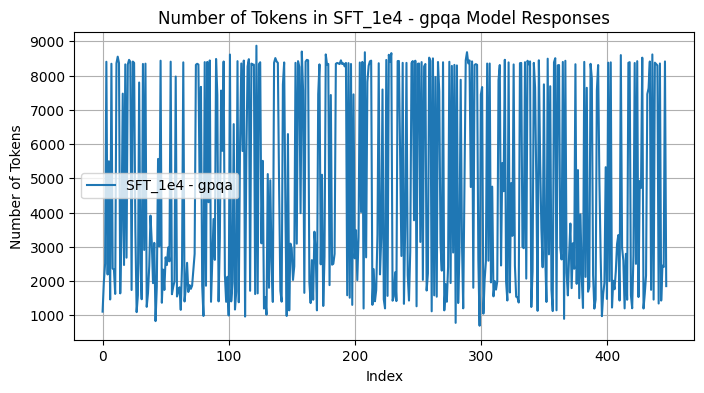

Number of spikes in SFT_1e4 - gpqa: 143


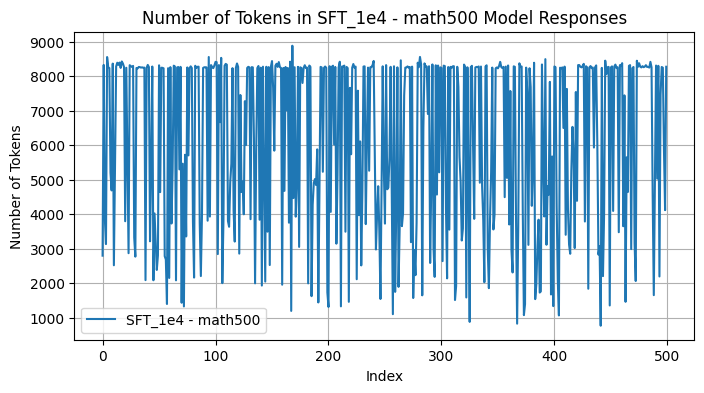

Number of spikes in SFT_1e4 - math500: 253
   Dataset   Avg Tokens  Num Spikes
0   aime24  7685.100000          23
1     gpqa  4623.919643         143
2  math500  6130.130000         253


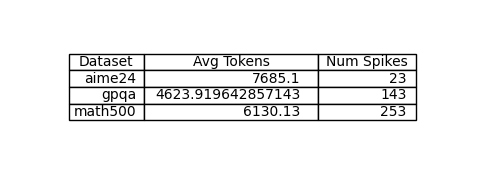

SFT_1e5


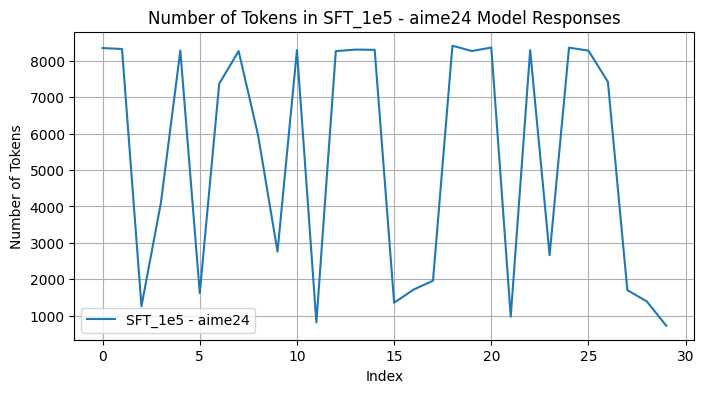

Number of spikes in SFT_1e5 - aime24: 14


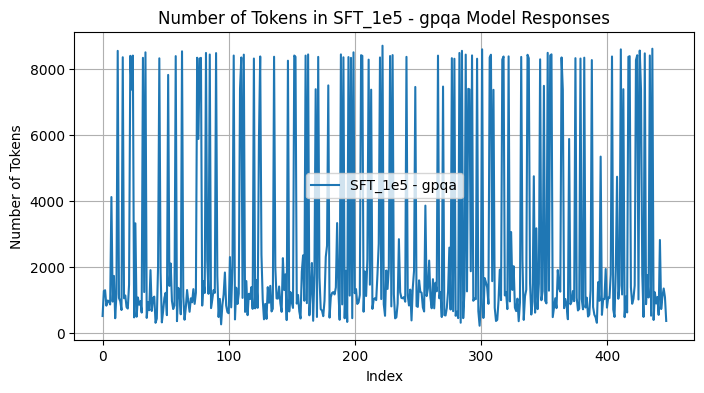

Number of spikes in SFT_1e5 - gpqa: 76


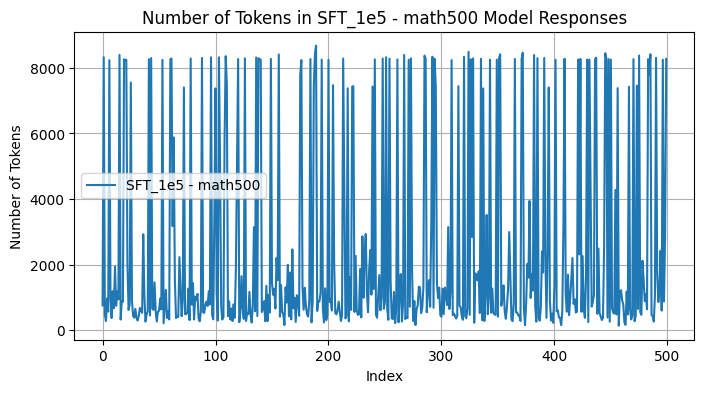

Number of spikes in SFT_1e5 - math500: 78
   Dataset   Avg Tokens  Num Spikes
0   aime24  5338.033333          14
1     gpqa  2598.953125          76
2  math500  2357.034000          78


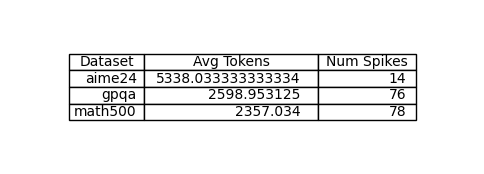

SFT_1e6


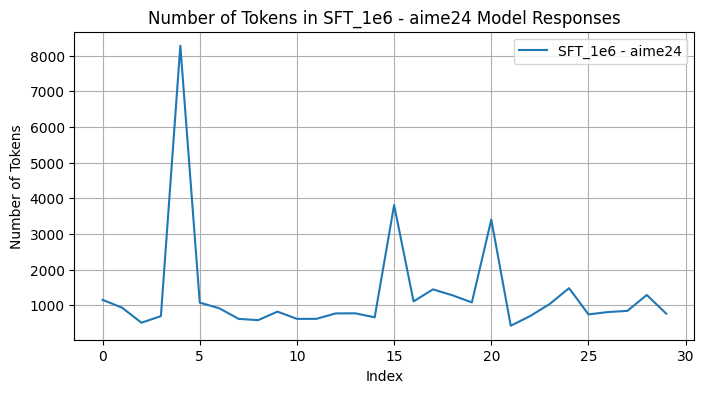

Number of spikes in SFT_1e6 - aime24: 1


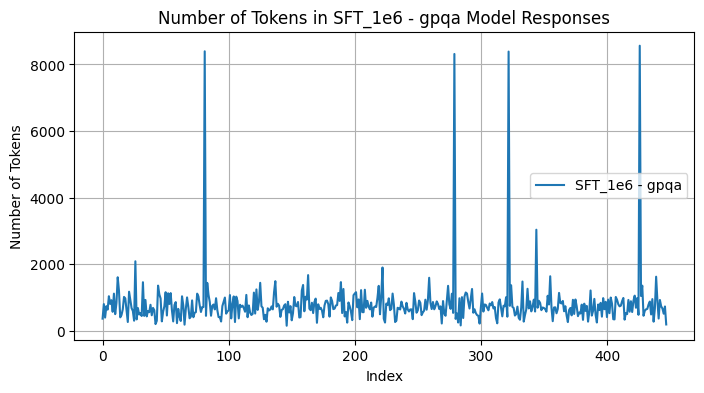

Number of spikes in SFT_1e6 - gpqa: 4


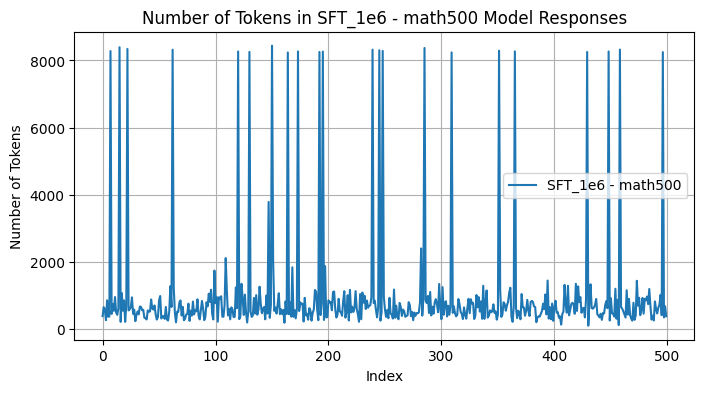

Number of spikes in SFT_1e6 - math500: 22
   Dataset   Avg Tokens  Num Spikes
0   aime24  1311.433333           1
1     gpqa   796.997768           4
2  math500   974.424000          22


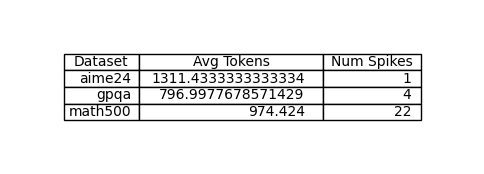

SFT_2e4


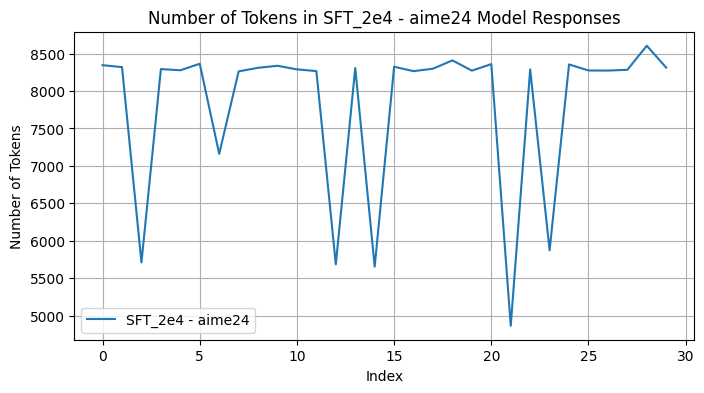

Number of spikes in SFT_2e4 - aime24: 24


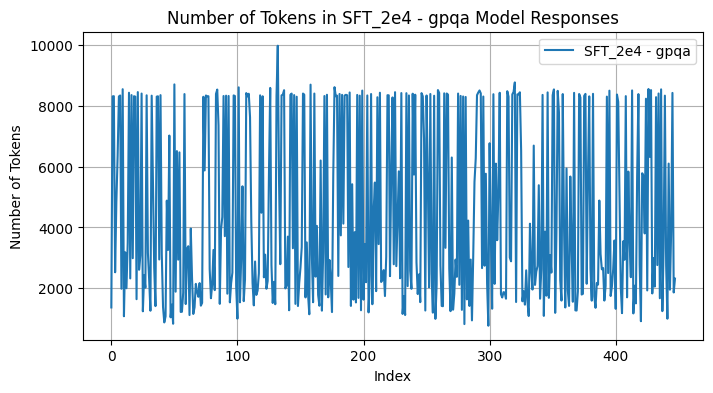

Number of spikes in SFT_2e4 - gpqa: 133


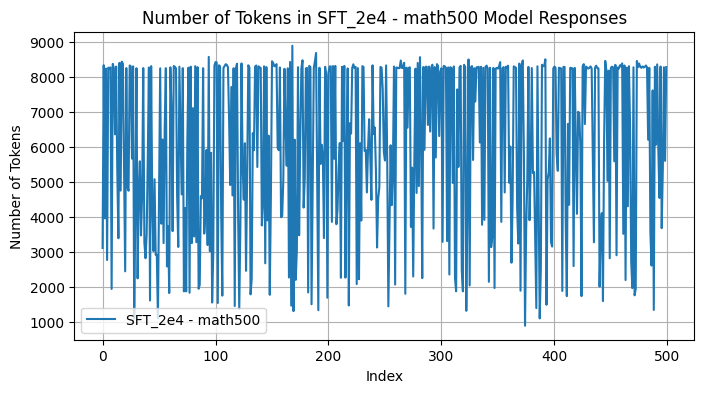

Number of spikes in SFT_2e4 - math500: 228
   Dataset   Avg Tokens  Num Spikes
0   aime24  7821.800000          24
1     gpqa  4418.785714         133
2  math500  6039.332000         228


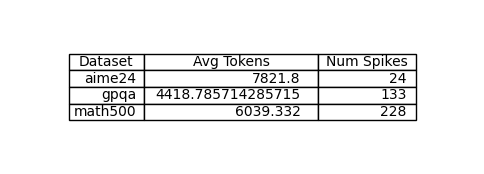

SFT_5e6


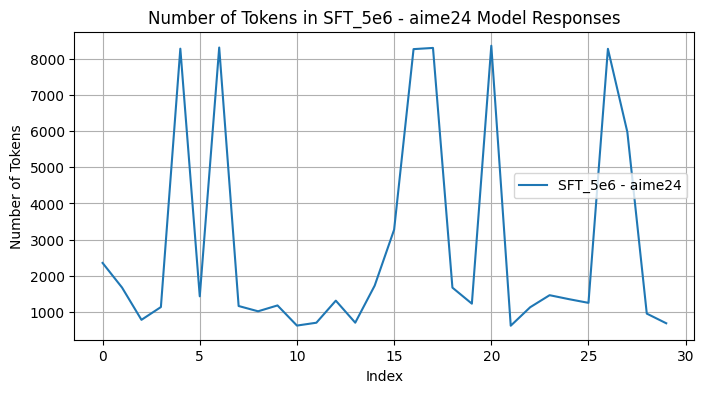

Number of spikes in SFT_5e6 - aime24: 6


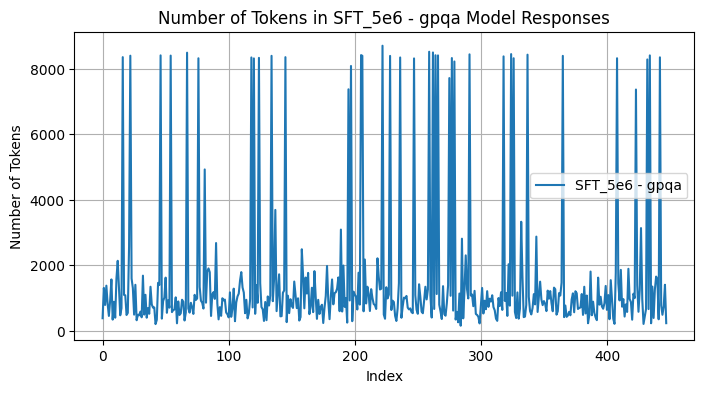

Number of spikes in SFT_5e6 - gpqa: 34


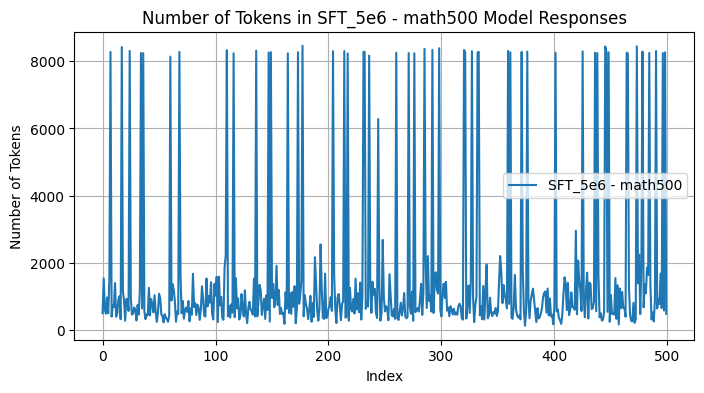

Number of spikes in SFT_5e6 - math500: 51
   Dataset   Avg Tokens  Num Spikes
0   aime24  2840.300000           6
1     gpqa  1544.787946          34
2  math500  1552.606000          51


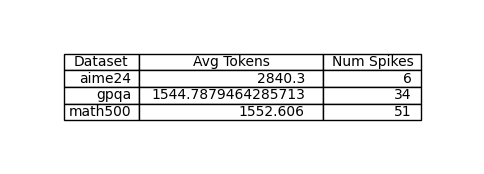

R1


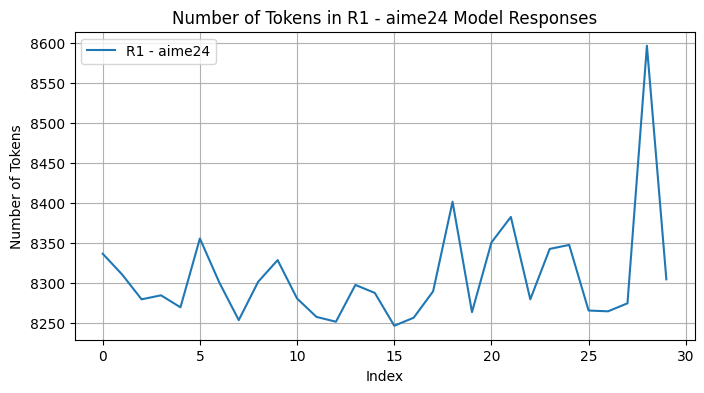

Number of spikes in R1 - aime24: 30


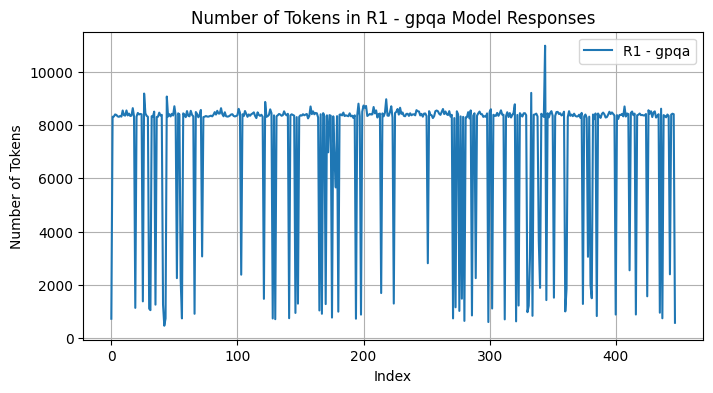

Number of spikes in R1 - gpqa: 379


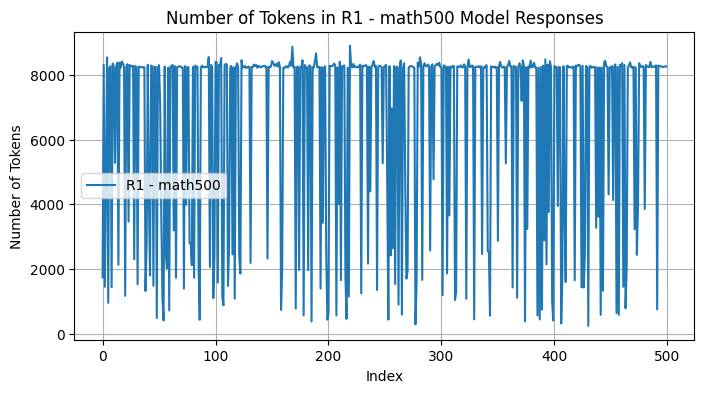

Number of spikes in R1 - math500: 361
   Dataset   Avg Tokens  Num Spikes
0   aime24  8308.166667          30
1     gpqa  7357.839286         379
2  math500  6561.544000         361


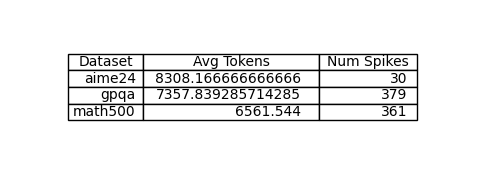

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-1.5B-Instruct")

datasets = ["aime24", "gpqa", "math500"]

for prompt_type, dataset_paths in file_paths.items():
    print(prompt_type)
    results = []

    for dataset in datasets:
        try:
            file_path = dataset_paths[dataset]
            df = pd.read_csv(file_path)

            # Calculate number of tokens using the model's tokenizer
            df["num_tokens"] = df["model_response"].apply(
                lambda x: len(tokenizer.encode(x)) if isinstance(x, str) else 0
            )  # Handle potential NaN values

            # Create the plot
            plt.figure(figsize=(8, 4))
            plt.plot(df["num_tokens"], label=f"{prompt_type} - {dataset}")
            plt.title(f"Number of Tokens in {prompt_type} - {dataset} Model Responses")
            plt.xlabel("Index")
            plt.ylabel("Number of Tokens")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Compute statistics
            tokens = df["num_tokens"]
            avg_tokens = tokens.mean()
            median_tokens = tokens.median()
            mad = np.median(np.abs(tokens - median_tokens))

            num_spikes = (tokens > 8000).sum()

            # Print and store results
            print(f"Number of spikes in {prompt_type} - {dataset}: {num_spikes}")
            results.append([dataset, avg_tokens, num_spikes])

        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except KeyError as e:
            print(f"KeyError: {e} in {file_path}. Check column names.")
        except Exception as e:
            print(f"An unexpected error occurred processing {file_path}: {e}")

    # Display results in a table
    results_df = pd.DataFrame(results, columns=["Dataset", "Avg Tokens", "Num Spikes"])
    print(results_df)

    # Display table using matplotlib
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc="center")
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width([0, 1, 2])
    plt.show()


In [ ]:
import pandas as pd

datasets = ["aime24", "gpqa", "math500"]
counts = {}

for prompt_type, dataset_paths in file_paths.items():
    print(prompt_type)

    for dataset in datasets:
        try:
            file_path = dataset_paths[dataset]
            df = pd.read_csv(file_path)

            def check_format(response):
                if isinstance(response, str):
                    parts = response.split("assistant\n")  # Split at first occurrence of "assistant"
                    # print(parts)
                    return "think" in parts[1][:100]
                        # first_token = second_part.split()[0] if second_part else ""
                        # return first_token.lower() == "think"
                return False

            # Count occurrences
            count = df["model_response"].apply(check_format).sum()
            counts[(prompt_type, dataset)] = count
            print(f"Count of responses following format in {prompt_type} - {dataset}: {count}")

        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except KeyError as e:
            print(f"KeyError: {e} in {file_path}. Check column names.")
        except Exception as e:
            print(f"An unexpected error occurred processing {file_path}: {e}")


COT
Count of responses following format in COT - aime24: 0
Count of responses following format in COT - gpqa: 0
Count of responses following format in COT - math500: 0
Standard
Count of responses following format in Standard - aime24: 0
Count of responses following format in Standard - gpqa: 0
Count of responses following format in Standard - math500: 0
ZeroShot
Count of responses following format in ZeroShot - aime24: 0
Count of responses following format in ZeroShot - gpqa: 0
Count of responses following format in ZeroShot - math500: 0
COD
Count of responses following format in COD - aime24: 0
Count of responses following format in COD - gpqa: 0
Count of responses following format in COD - math500: 0
SFT_1e4
Count of responses following format in SFT_1e4 - aime24: 0
Count of responses following format in SFT_1e4 - gpqa: 0
Count of responses following format in SFT_1e4 - math500: 0
SFT_1e5
Count of responses following format in SFT_1e5 - aime24: 0
Count of responses following format i

In [15]:
len(dataset["train"]["deepseek_attempt"])

TypeError: string indices must be integers, not 'str'

In [ ]:
import re

# Define the regex pattern
pattern = r"boxed\{(.*?)\}"

ct = 0

# Iterate through the samples in the dataset
for sample in dataset["train"]["deepseek_attempt"]:
    sample = sample[:-100]
    if isinstance(sample, str):  # Ensure the sample is a string
        for match in re.finditer(pattern, sample):
            start, end = match.span()  # Get match positions
            context_before = sample[max(0, start - 20):start]  # 20 chars before
            context_after = sample[end:end + 20]  # 20 chars after
            ct += 1
            print(f"...{context_before}[{match.group()}]{context_after}...")  # Highlight match

print(f"Total count of matches: {ct}")


...the Be nuclei is \(\[boxed{1.5 \times 10^{5}] \text{ m/s}}\) and...
...e expressed as:
\[
\[boxed{\frac{d^{2}] x}{d t^{2}} = -\fra...
...nd{pmatrix}
\]

\[
\[boxed{\begin{pmatrix}] \frac{1}...
...count is six. 

\[
\[boxed{a^2 + b^2 + c^2}] =...
...of symbols is:

\[
\[boxed{2}]
\]

The codewords a...
...1}{1+x^2}\right) = \[boxed{\pi e^{-2\pi |x|}]}
\]
\[
S\left(\frac...
...1+x^2)^2}\right) = \[boxed{\frac{\pi}]{2} \left(1 + 2\pi |...
...et the formula:
\[
\[boxed{p_{12}] = t(c_1 + c_2) + \f...
... of \( |G| \).

\[
\[boxed{\sqrt[p]{n^n}]}
\]

\[
\boxed{...
...he moving clock is \[boxed{-295}] picoseconds per ...
...ssible reactions:

\[boxed{D}] (Answer choices mig...
... time \( t \).

\[
\[boxed{\text{Check every position of the form }] A + Bt \text{ for a...
...Final Answer**:
\[
\[boxed{\dfrac{r_p}]{0.819c}}
\]

This f...
...# Final Answer

a) \[boxed{P(x) = x - \dfrac{1}]{5}x^2}

b) The exis...
...nal answer is:

\[
\[boxed{a = - s x - \mu g}]
\]

where \( s \) i...
...button

In [ ]:
ct

913

In [ ]:
for sample in dataset["train"]["deepseek_attempt"]:
    sample = sample.split("\n")[-2]
    print(sample)
    print("-----------------------------")


-----------------------------
\boxed{\text{Such a point } y \text{ exists as described}}
-----------------------------

-----------------------------
\boxed{169} \, \text{m/s}
-----------------------------
\boxed{0.88\%}
-----------------------------
\boxed{181}
-----------------------------
**Answer:**  
-----------------------------

-----------------------------
\boxed{157}
-----------------------------

-----------------------------

-----------------------------

-----------------------------
\boxed{f(\nu) \text{ is monotonically decreasing on } (0, 1)}
-----------------------------
\boxed{187.12}
-----------------------------
\boxed{ \left(\int_0^\infty f(x) \, dx \right)^3 \leq 8\left(\int_0^\infty f(x)^2 \, dx \right) \left(\int_0^\infty xf(x) \, dx \right) }
-----------------------------

-----------------------------
\boxed{789953}
-----------------------------

-----------------------------

-----------------------------
\boxed{78}
-----------------------------

-----------

IndexError: list index out of range